# Data analysis of the podcasts on iTunes platform

### Introduction: 
In this analysis, we thoroughly examine the podcasts available on the iTunes platform. We have data on the podcasts, their genres, and user reviews. Our analysis focuses on various metrics, including ratings, the number of reviews, and their frequency in the dataset, to identify interesting podcasts and genres.
### Results:
Our analysis of iTunes podcasts reveals key trends and insights. The most frequent genres are Society-Culture, Education, Comedy, Religion-Spirituality, and Business, while volleyball, mathematics, chemistry, and physics are least frequent. Diverse podcasts like Pursue Excellence, Frazerrice.com, and Beyond Retirement have perfect ratings but low popularity. Crime Junkie dominates with significantly more reviews than other podcasts.

The true-crime and kids-family-stories-for-kids genres tend to collect the most reviews. Business podcasts have notably high ratings, while true-crime and news-daily-news have lower average ratings. We observed that higher ratings often correlate with fewer reviews, except for kids-related topics. Reviews peaked midweek, especially on Wednesdays.

Import the required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper_functions import customize_bar
import statsmodels.api as sm
import duckdb

Take a first look into the tables:

In [2]:
categories = pd.read_csv("categories.csv")
podcasts = pd.read_csv("podcasts.csv")
reviews = pd.read_csv("reviews.csv")

In [3]:
categories.head()

,podcast_id,category
0,c61aa81c9b929a66f0c1db6cbe5d8548,arts
1,c61aa81c9b929a66f0c1db6cbe5d8548,arts-performing-arts
2,c61aa81c9b929a66f0c1db6cbe5d8548,music
3,ad4f2bf69c72b8db75978423c25f379e,arts
4,ad4f2bf69c72b8db75978423c25f379e,arts-design


In [4]:
categories.shape

(212372, 2)

In [5]:
categories.dtypes

podcast_id    object
category      object
dtype: object

In [6]:
podcasts.head()

,podcast_id,itunes_id,slug,itunes_url,title
0,a00018b54eb342567c94dacfb2a3e504,1313466221,scaling-global,https://podcasts.apple.com/us/podcast/scaling-...,Scaling Global
1,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando
2,a0004b1ef445af9dc84dad1e7821b1e3,139076942,mystery-dancing-in-the-dark,https://podcasts.apple.com/us/podcast/mystery-...,Mystery: Dancing in the Dark
3,a00071f9aaae9ac725c3a586701abf4d,1332508972,kts-money-matters,https://podcasts.apple.com/us/podcast/kts-mone...,KTs Money Matters
4,a000a500f06555f81220c3eb641aded7,1544900779,word-on-the-street-w-dreak-swift,https://podcasts.apple.com/us/podcast/word-on-...,Word on the Street w/ Dreak Swift


In [7]:
podcasts.shape

(110024, 5)

In [8]:
podcasts.dtypes

podcast_id    object
itunes_id      int64
slug          object
itunes_url    object
title         object
dtype: object

In [9]:
reviews.head()

,podcast_id,rating,author_id,created_at
0,c61aa81c9b929a66f0c1db6cbe5d8548,5,F7E5A318989779D,2018-04-24T12:05:16-07:00
1,c61aa81c9b929a66f0c1db6cbe5d8548,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00
2,ad4f2bf69c72b8db75978423c25f379e,1,1AB95B8E6E1309E,2019-06-11T14:53:39-07:00
3,ad4f2bf69c72b8db75978423c25f379e,5,11BB760AA5DEBD1,2018-05-31T13:08:09-07:00
4,ad4f2bf69c72b8db75978423c25f379e,5,D86032C8E57D15A,2019-06-19T13:56:05-07:00


In [10]:
reviews.shape

(2067527, 4)

In [11]:
reviews.dtypes

podcast_id    object
rating         int64
author_id     object
created_at    object
dtype: object

In [12]:
reviews["created_at"] = pd.to_datetime(reviews["created_at"])

In [13]:
reviews

,podcast_id,rating,author_id,created_at
0,c61aa81c9b929a66f0c1db6cbe5d8548,5,F7E5A318989779D,2018-04-24 12:05:16-07:00
1,c61aa81c9b929a66f0c1db6cbe5d8548,5,F6BF5472689BD12,2018-05-09 18:14:32-07:00
2,ad4f2bf69c72b8db75978423c25f379e,1,1AB95B8E6E1309E,2019-06-11 14:53:39-07:00
3,ad4f2bf69c72b8db75978423c25f379e,5,11BB760AA5DEBD1,2018-05-31 13:08:09-07:00
4,ad4f2bf69c72b8db75978423c25f379e,5,D86032C8E57D15A,2019-06-19 13:56:05-07:00
...,...,...,...,...
2067522,ca0ed0b0822c8f76fe7f41a4027c3907,5,C79E747DAA69C6E,2022-11-06 11:25:14-07:00
2067523,fe5dc7e58a8bb72a4b2cc4ec43378313,5,B4C64915C026463,2022-12-14 14:33:47-07:00
2067524,ec0898451fd6b961c42beceaeec43648,5,EE7877B6C336602,2023-02-16 08:15:52-07:00
2067525,ebc36287c28e63f458d55fd2a25e6658,5,F9AF6C4B6E68787,2022-10-25 14:52:02-07:00


In [14]:
reviews.dtypes

podcast_id                                    object
rating                                         int64
author_id                                     object
created_at    datetime64[ns, pytz.FixedOffset(-420)]
dtype: object

  * Categories table: stores categories for different podcasts. There may be duplicate podcast_id values as some podcasts may belong to more than one category
      * podcast_id: id of the podcast
      * category: category of the podcast
  * Podcasts table: stores information about each podcast:
      * podcast_id
      * title
      * itunes_id
      * slug
      * itunes_url
  * Reviews table: reviews to podcasts
      * podcast_id
      * rating
      * author_id
      * created_at

### Now, let's perform data cleaning

categories table:

In [15]:
categories.head()

,podcast_id,category
0,c61aa81c9b929a66f0c1db6cbe5d8548,arts
1,c61aa81c9b929a66f0c1db6cbe5d8548,arts-performing-arts
2,c61aa81c9b929a66f0c1db6cbe5d8548,music
3,ad4f2bf69c72b8db75978423c25f379e,arts
4,ad4f2bf69c72b8db75978423c25f379e,arts-design


In [16]:
categories.isnull().any()

podcast_id    False
category      False
dtype: bool

In [17]:
questions_q = '''
                SELECT DISTINCT category
                FROM categories
                ORDER BY 1;
                '''
list(duckdb.query(questions_q).to_df()["category"])

['arts',
 'arts-books',
 'arts-design',
 'arts-fashion-beauty',
 'arts-food',
 'arts-performing-arts',
 'arts-visual-arts',
 'buddhism',
 'business',
 'business-careers',
 'business-entrepreneurship',
 'business-investing',
 'business-management',
 'business-marketing',
 'business-non-profit',
 'christianity',
 'comedy',
 'comedy-comedy-interviews',
 'comedy-improv',
 'comedy-stand-up',
 'education',
 'education-courses',
 'education-how-to',
 'education-language-learning',
 'education-self-improvement',
 'fiction',
 'fiction-comedy-fiction',
 'fiction-drama',
 'fiction-science-fiction',
 'government',
 'health-fitness',
 'health-fitness-alternative-health',
 'health-fitness-fitness',
 'health-fitness-medicine',
 'health-fitness-mental-health',
 'health-fitness-nutrition',
 'health-fitness-sexuality',
 'hinduism',
 'history',
 'islam',
 'judaism',
 'kids-family',
 'kids-family-education-for-kids',
 'kids-family-parenting',
 'kids-family-pets-animals',
 'kids-family-stories-for-kids',
 

podcasts table

In [18]:
podcasts.isnull().any()

podcast_id    False
itunes_id     False
slug          False
itunes_url    False
title          True
dtype: bool

In [19]:
podcasts["itunes_url"].is_unique

True

In [20]:
podcasts["podcast_id"].is_unique

True

In [21]:
podcasts["slug"].is_unique

False

In [22]:
podcasts["title"].is_unique

False

In [23]:
podcasts.head()

,podcast_id,itunes_id,slug,itunes_url,title
0,a00018b54eb342567c94dacfb2a3e504,1313466221,scaling-global,https://podcasts.apple.com/us/podcast/scaling-...,Scaling Global
1,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando
2,a0004b1ef445af9dc84dad1e7821b1e3,139076942,mystery-dancing-in-the-dark,https://podcasts.apple.com/us/podcast/mystery-...,Mystery: Dancing in the Dark
3,a00071f9aaae9ac725c3a586701abf4d,1332508972,kts-money-matters,https://podcasts.apple.com/us/podcast/kts-mone...,KTs Money Matters
4,a000a500f06555f81220c3eb641aded7,1544900779,word-on-the-street-w-dreak-swift,https://podcasts.apple.com/us/podcast/word-on-...,Word on the Street w/ Dreak Swift


reviews

In [24]:
reviews.isnull().any()

podcast_id    False
rating        False
author_id     False
created_at    False
dtype: bool

In [25]:
reviews["rating"].unique()

array([5, 1, 3, 4, 2])

We have found no missing values in all the tables. There are no outliers to be treated. The data is clean for our exploratory data analysis.

### Exploratory data analysis

In the EDA we will answer the following questions:
   * **What are most popular categories of podcasts?**
   * **What are the least popular genres of podcasts?**
   * **which podcasts are most diverse(they have the biggest number of categories)?**
   * **What are the distributions of average ratings for podcasts and number of reviews for podcasts**
   * **What are the best-rated podcasts with the biggest number of reviews?**
   * **What are the most popular podcasts(have the biggest number of reviews)?**
   * **What are the genres that tend to collect more reviews?**
   * **What genres do get less reviews?**
   * **Which genres have the highest average ratings?**
   * **Which genres have the lowest average ratings?**
   * **In what years, the reviews where posted?**
   * **In what days of the week were the reviews posted?**

**What are most popular categories of podcasts?**

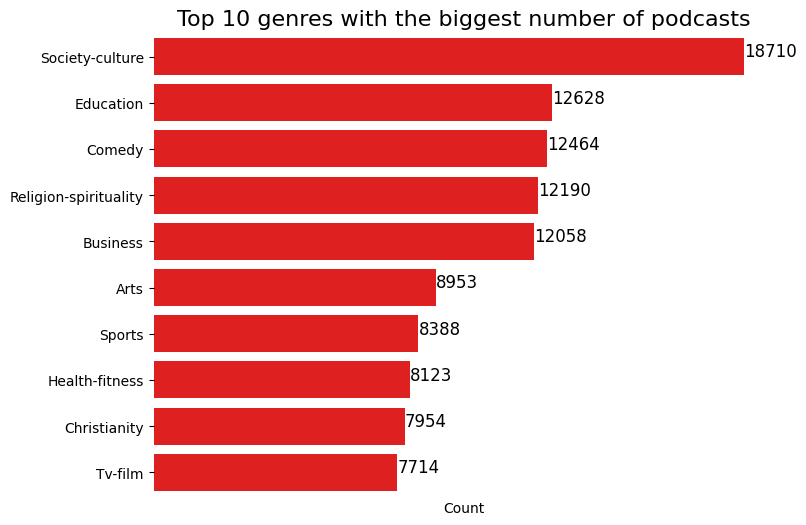

In [26]:
# count number of occurrences for each category
category_count_q = '''
                SELECT category, COUNT(*) CategoriesNumber
                FROM categories
                GROUP BY 1
                ORDER BY 2 DESC
           '''
category_count = duckdb.query(category_count_q).to_df()

fig = plt.figure(figsize=(8, 6))
ax = sns.barplot(y="category", x="CategoriesNumber", 
            data=category_count.head(10), color="red")
customize_bar("h", ax)
ax.set_ylabel("")
ax.set_xlabel("Count")
ax.set_title("Top 10 genres with the biggest number of podcasts",
            fontsize=16)
ylabels = ax.get_yticklabels()
ax.set_yticks(range(10))
ax.set_yticklabels([label.get_text().capitalize() for label in ylabels]);

Examining the bar plot reveals the following: the **Society-Culture** genre emerges as the most prevalent category of podcasts. **Education**, **Comedy**, **Religion-Spirituality**, and **Business** categories precede it in popularity.

**What are the least popular genres of podcasts?**

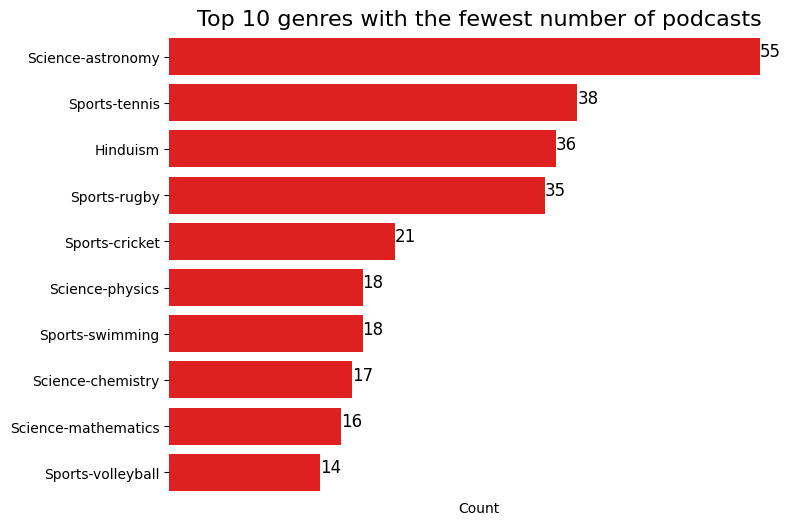

In [27]:
fig = plt.figure(figsize=(8, 6))
ax = sns.barplot(y="category", x="CategoriesNumber", 
            data=category_count.tail(10), color="red")
customize_bar("h", ax)
ax.set_ylabel("")
ax.set_xlabel("Count")
ax.set_title("Top 10 genres with the fewest number of podcasts",
         fontsize=16)
ylabels = ax.get_yticklabels()
ax.set_yticks(range(10))
ax.set_yticklabels([label.get_text().capitalize() for label in ylabels]);

It is not suprising that the least popular genres are specific topics. Here these topics are related to **science**, **sport** or **religion**

**Our next objective is to find out which podcasts are most diverse(they have the biggest number of categories)**

In [28]:
pd.set_option('display.max_colwidth', 200)
# for each podcast, count number of categories
cat_count_q = '''
    WITH cat_count AS (SELECT podcast_id, 
                      GROUP_CONCAT(category) categories, 
                      COUNT(*) CategoriesNumber
                      FROM categories
                      GROUP BY 1)
    SELECT p.title, cc.categories, cc.CategoriesNumber
    FROM podcasts p
    JOIN cat_count cc ON cc.podcast_id = p.podcast_id
    '''
podcast_categories = duckdb.query(cat_count_q).to_df()

# extract podcasts with the biggest number of categories
max_categories = (
    podcast_categories["CategoriesNumber"] == 
    podcast_categories["CategoriesNumber"].max())
most_diverse_pod = (podcast_categories[max_categories])

In [29]:
most_diverse_pod

,title,categories,CategoriesNumber
1154,Beyond Retirement,"business,business-careers,education,education-self-improvement,society-culture,society-culture-personal-journals,society-culture-philosophy,society-culture-places-travel",8
41781,Pursue Excellence,"arts,business,business-entrepreneurship,christianity,education,religion-spirituality,society-culture,society-culture-personal-journals",8
49463,FrazerRice.Com,"business,business-careers,business-entrepreneurship,business-investing,news,news-business-news,society-culture,society-culture-personal-journals",8


**Pursue excellence**, **frazerrice.com** and **beyond retirement** are podcasts with the biggest number of categories.

Are they popular and well-rated?

In [30]:
titles = most_diverse_pod["title"].values

# calculate rating and number of reviews for these podcasts
diverse_stats_q = '''
    WITH diverse_podcasts AS 
        (SELECT title, podcast_id
        FROM podcasts
        WHERE title IN {})
    SELECT dp.title, AVG(r.rating) rating, COUNT(*) ReviewsNumber
    FROM reviews r
    JOIN diverse_podcasts dp
    ON dp.podcast_id = r.podcast_id
    GROUP BY 1
'''.format(tuple(titles))
duckdb.query(diverse_stats_q).to_df()

,title,rating,ReviewsNumber
0,Pursue Excellence,5.0,5
1,FrazerRice.Com,5.0,6
2,Beyond Retirement,5.0,50


All three of the podcasts are perfectlly rated. **Beyond Retirement** stands out by having more reviews than others. Though, we can't consider any of the podcast to be popular.

Now, let's try to look into distributions:
   * **distribution of average ratings for podcasts**
   * **distribution of number of reviews for podcasts**

In [31]:
# for each podcast, calculate rating and number of reviews
podcast_stat_query = '''
    SELECT podcast_id, AVG(rating) rating, COUNT(*) ReviewsNumber  
    FROM reviews
    GROUP BY 1
'''
podcast_rating = duckdb.query(podcast_stat_query).to_df()
podcast_rating.describe()

,rating,ReviewsNumber
count,111544.000000,111544.000000
mean,4.808736,18.535529
std,0.570094,150.173829
min,1.000000,1.000000
25%,5.000000,1.000000
50%,5.000000,3.000000
75%,5.000000,8.000000
max,5.000000,33104.000000


Both of the distributions are highly skewed. The majority of the podcasts are perfectly rated as well as the majority of the podcasts have less then 10 reviews. However, some podcasts have huge number of reviews. From now on, we will focus on analyzing podcasts and genres using these metrics

**What are the best-rated podcasts with the biggest number of reviews?**

In [32]:
# for 5-rated podcasts, extract those with the biggest number
# reviews
best_rated_q = '''
    WITH podcast_stat AS (SELECT podcast_id, AVG(rating) rating,
                    COUNT(*) ReviewsNumber
                FROM reviews
                GROUP BY 1
                HAVING AVG(rating) = 5
                ORDER BY 3 DESC
                LIMIT 5),
    cat_count AS 
                (SELECT ps.*, GROUP_CONCAT(c.category) categories
                FROM categories c JOIN podcast_stat ps 
                ON ps.podcast_id = c.podcast_id
                GROUP BY 1,2,3)
    SELECT p.title, cc.*
    FROM podcasts p
    RIGHT JOIN cat_count cc ON cc.podcast_id = p.podcast_id
    ORDER BY cc.ReviewsNumber DESC
    '''
best_rated = duckdb.query(best_rated_q).to_df()
best_rated

,title,podcast_id,rating,ReviewsNumber,categories
0,I Think You're Dope w/ Eric Nam,c7f9080a38ec42689e444c53d81967bb,5.0,538,"music,music-music-interviews"
1,IKE Brewers Podcast,e825adeee58752ff193c6e0eff321256,5.0,297,"sports,sports-baseball"
2,Fun and Gains,c01b6700786009814d04f05203162dd8,5.0,287,"health-fitness,health-fitness-fitness,society-culture"
3,Drink in the Movies,bd2097cecfb48fd2d2c46dda1bc8d74b,5.0,267,"society-culture,tv-film"
4,Garage Gym Athlete,b08ac2e548d9db482d23f1034bee8887,5.0,262,"health-fitness,health-fitness-fitness,society-culture,society-culture-philosophy"


**I think you're dope with Eric Nam** stands out by having the most number of reviews(538) while having the perfect rating. The genre of this podcast is music. We have to note **health-fitness** genre as among the best-rated podcasts with the biggest number of reviews. It has 2 podcasts

**What are the most popular podcasts(have the biggest number of reviews)?**

In [33]:
# query to calculate rating and number of reviews 
# for podcasts which have > 5000 reviews
podcast_reviews_q = '''
    WITH most_reviewed AS 
        (SELECT podcast_id, AVG(rating) rating, COUNT(*) ReviewsNumber
        FROM reviews
        GROUP BY 1
        HAVING COUNT(*) > 5000)
    SELECT p.title, mr.*
    FROM podcasts p
    JOIN most_reviewed mr ON mr.podcast_id = p.podcast_id
    ORDER BY mr.ReviewsNumber DESC
    '''
podcast_reviews = duckdb.query(podcast_reviews_q).to_df()

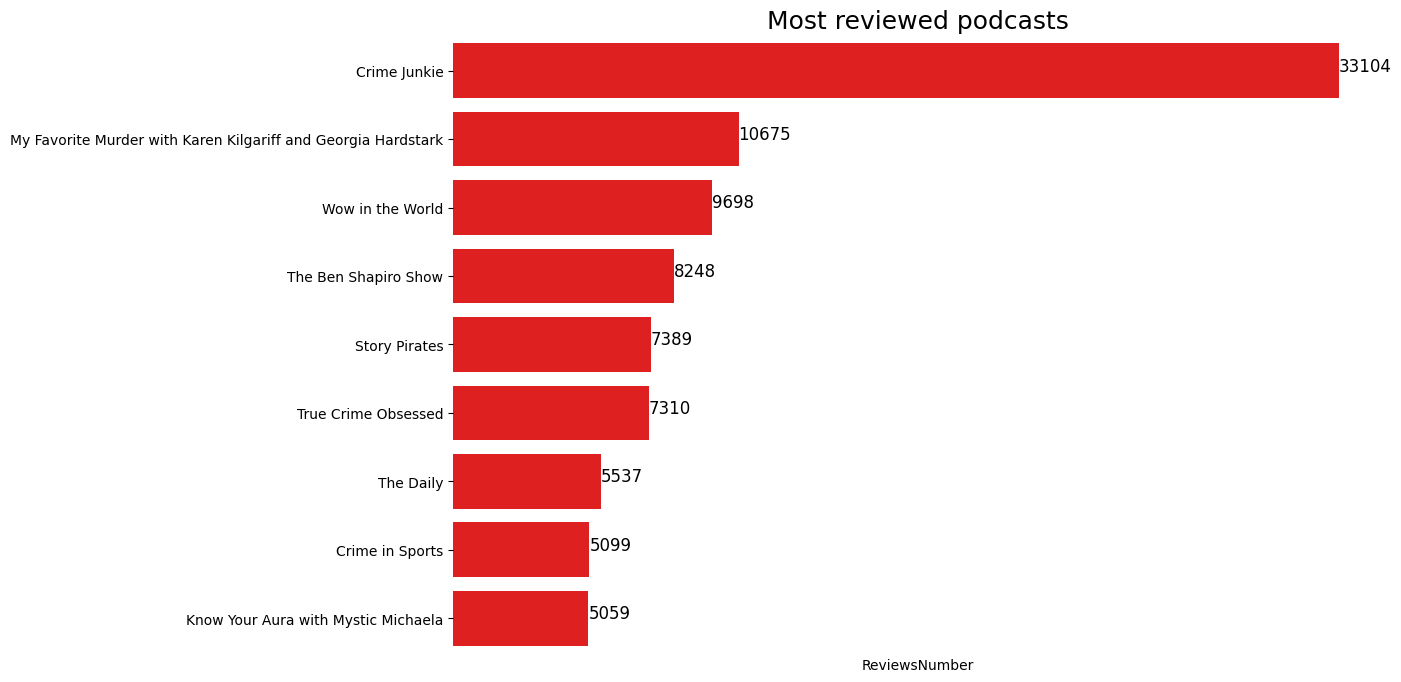

In [34]:
fig = plt.figure(figsize=(12, 8))
sns.barplot(x="ReviewsNumber", y="title", 
            data=podcast_reviews, color="red")
customize_bar("h", plt.gca())
plt.title("Most reviewed podcasts", fontsize=18)
plt.ylabel("");

By looking at these graph, we see an absolute leader among the podcasts: **"Crime junkie"**. It has 3 times more reviews than the 2nd most popular podcast. Let's also look into its rating and genre:

In [35]:
podcast_reviews[podcast_reviews["title"] == "Crime Junkie"]["rating"]

0    4.274982
Name: rating, dtype: float64

Considering number of reviews it has, this podcast has pretty solid rating

In [36]:
# extract podcast_id of this podcast
crime_junkie_id = (podcast_reviews[
    podcast_reviews["title"] == "Crime Junkie"]["podcast_id"].values[0])

# extract the category of this podcast
crime_junkie_genre_q = '''
    SELECT category 
    FROM categories WHERE podcast_id = '{}'
    '''.format(crime_junkie_id)
duckdb.query(crime_junkie_genre_q).to_df()

,category
0,true-crime


"Crime Junkie" podcast has **true-crime** genre. Moreover, we see an interesting pattern here: among top 10 most popular podcasts by reviews, a lot of them(including the most popular) have titles that are related to crime. Therefore, our next question will be:

**What are the genres that tend to collect more reviews?**

To answer this question, we will calculate number of reviews per podcast for each genre. We will keep genres that have more than 100 podcasts in the dataset.
We will also omit the Crime Junkie podcast as it could affect reviews per podcast in the true-crime genre.

In [37]:
# for each genre, calculate average number of reviews per podcast
# (excluding crime junkie podcast)
reviews_per_pod_q = '''
    WITH pod_stat AS (SELECT podcast_id, COUNT(*) ReviewsNumber, 
                    AVG(rating) rating
                    FROM reviews
                    WHERE podcast_id != '{}'
                    GROUP BY 1)
    SELECT c.category, 
    CAST(SUM(ReviewsNumber) AS FLOAT) / COUNT(ps.podcast_id)
    AS ReviewsPerPodcasts,
    AVG(ps.rating) rating
    FROM categories c
    JOIN pod_stat ps ON ps.podcast_id = c.podcast_id
    GROUP BY 1
    HAVING COUNT(*) > 100
    ORDER BY 2 DESC
    '''.format(crime_junkie_id)

reviews_per_pod =  duckdb.query(reviews_per_pod_q).to_df()

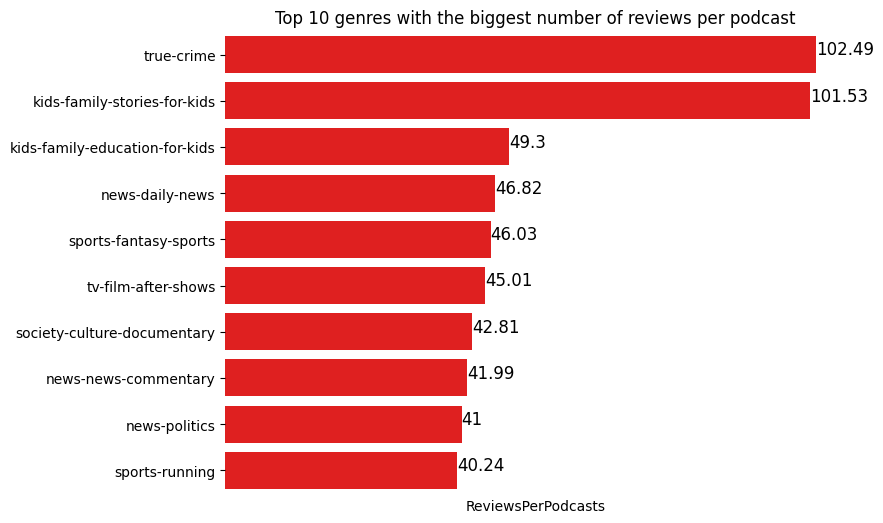

In [38]:
fig = plt.figure(figsize=(8, 6))
more_reviews = reviews_per_pod.head(10)
ax = sns.barplot(y="category", x="ReviewsPerPodcasts", 
                 data=more_reviews, color="red")
customize_bar("h", ax)
plt.ylabel("")
plt.title("Top 10 genres with the biggest number of reviews per podcast");

Among top 10 genres which have most reviews per podcasts, we see two main leaders: **true-crime** and **kids-family-stories-for-kids**. They have more than 100 reviews per each podcast of its category. In this list, we also see a lot of **news** genres, some **sports** topics. In addition, there is sub-topic of **society-culture** genre, which is **society-culture-documentary**.

**Now, let's try to find out what genres get less reviews**

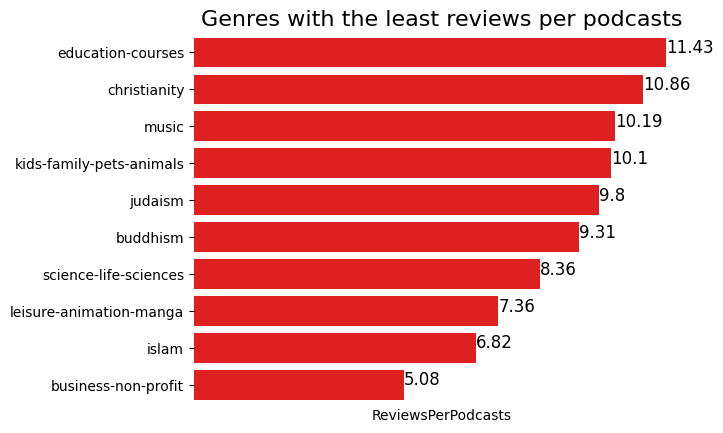

In [39]:
less_reviews = reviews_per_pod.tail(10)
ax = sns.barplot(y="category", 
                 x="ReviewsPerPodcasts", 
                 data=less_reviews, color="red")
customize_bar("h", ax)
plt.ylabel("")
plt.title("Genres with the least reviews per podcasts",
         fontsize=16);

Here **religion** related topics stand out. These categories are popular in the podcast world and don't collect a lot of reviews. In addition, we should note **music** genre.

**Which genres have the highest average ratings?**

In [40]:
# caclulate average rating for podcasts of each genre
# (only those genres which have more than 100 podcasts)
cat_rating_q = '''
            WITH pod_stat AS 
                        (SELECT podcast_id, AVG(rating) rating, 
                         COUNT(*) ReviewsNumber
                         FROM reviews
                         GROUP BY 1)
            SELECT c.category, AVG(ps.rating) rating
            FROM categories c
            JOIN pod_stat ps ON ps.podcast_id = c.podcast_id
            GROUP BY 1
            HAVING COUNT(*) > 100
            ORDER BY 2 DESC
            '''
cat_rating = duckdb.query(cat_rating_q).to_df()

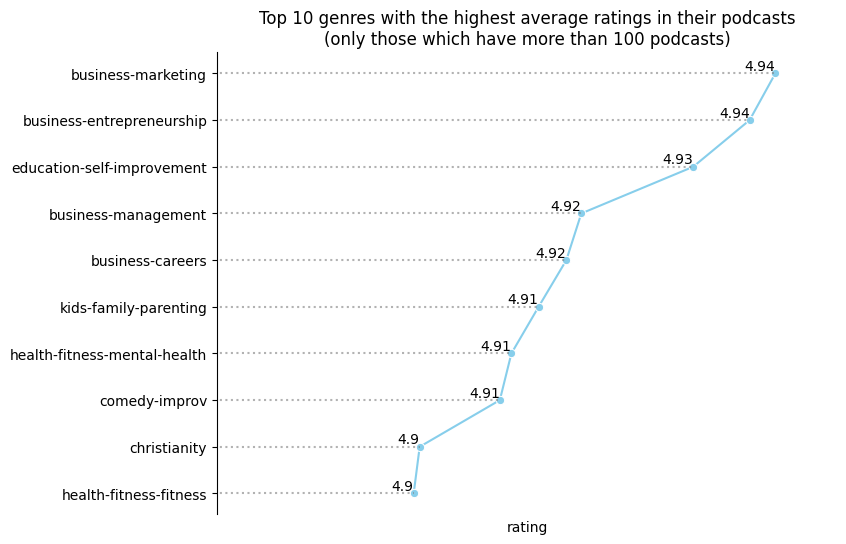

In [41]:
fig = plt.figure(figsize=(8, 6))
cat_toprating = cat_rating.head(10)
ax = sns.lineplot(y="category", x="rating", 
             data=cat_toprating, marker='o', color='skyblue')
for x, y in zip(cat_toprating['rating'], cat_toprating["category"]):
    plt.hlines(y, xmin=0, xmax=x, colors='gray', 
               linestyles='dotted', alpha=0.6)
    ax.text(x, y, round(x, 2), ha='right', va='bottom', fontsize=10)
plt.xlim(4.87, 4.95)
sns.despine(bottom=True)
plt.xticks([])
plt.title("Top 10 genres with the highest average ratings in their podcasts\n"
         "(only those which have more than 100 podcasts)")
plt.ylabel("");

This plot clearly shows us that **business** related podcasts tend to get very high ratings. **Self-improvement**, **health-fitness**, **comedy-improvisional**, **kids** and **religion** topics are decently rated as well.

**Which genres have the lowest average ratings?**

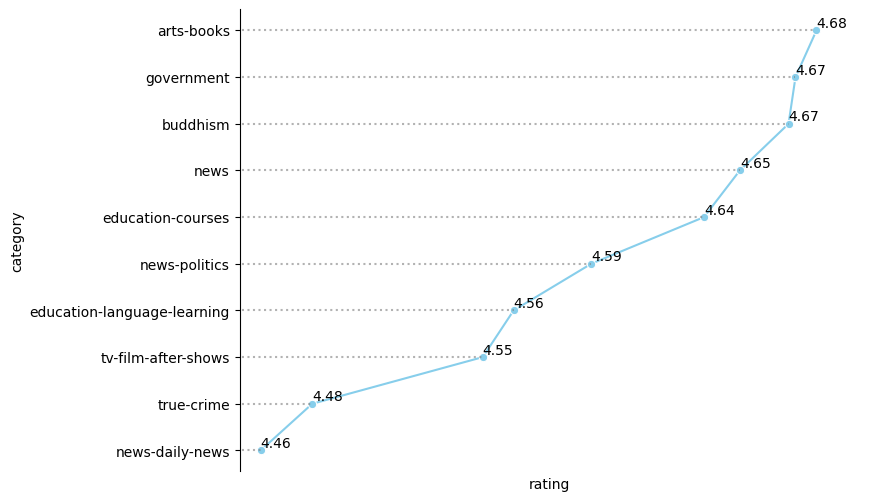

In [42]:
fig = plt.figure(figsize=(8, 6))
cat_worstrating = cat_rating.tail(10)
ax = sns.lineplot(y="category", x="rating", 
             data=cat_worstrating, marker='o', color='skyblue')
for x, y in zip(cat_worstrating['rating'], cat_worstrating["category"]):
    plt.hlines(y, xmin=0, xmax=x, colors='gray', 
               linestyles='dotted', alpha=0.6)
    ax.text(x, y, round(x, 2), ha='left', va='bottom', fontsize=10)
plt.xlim(4.45, 4.7)
sns.despine(bottom=True)
plt.xticks([]);

We see **true-crime** genre being the second worst rated genre. In addition, **news** podcasts tend to get lower ratings too(**news-daily-news** genre is the worst rated genre in the dataset). It is important to point out the presence of **buddhism** genre here. While **christianity** genre is among the best rated genres, buddhism is in the list of worst.
Two plots above show us that there is some negative correlation between number of reviews and ratings of the podcast. Let's dig into it more.

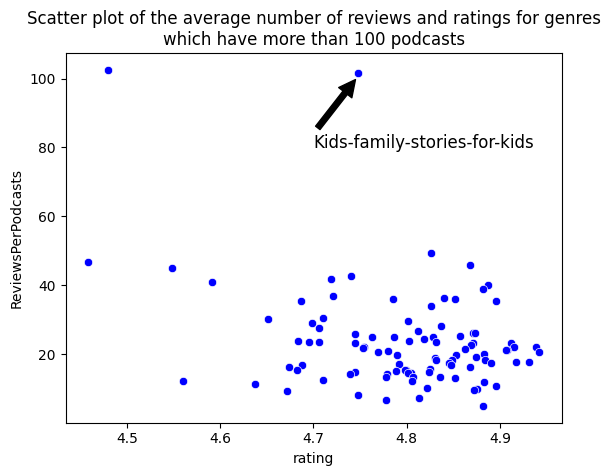

In [43]:
ax = sns.scatterplot(data=reviews_per_pod, 
                x="rating", y="ReviewsPerPodcasts", color="blue")
fam_stories = (reviews_per_pod[
    reviews_per_pod["category"] == "kids-family-stories-for-kids"])
fam_stories_x = fam_stories["rating"].iloc[0]
fam_stories_y = fam_stories["ReviewsPerPodcasts"].iloc[0]
plt.title("Scatter plot of the average number"
          " of reviews and ratings for genres\n"
          "which have more than 100 podcasts")

ax.annotate("Kids-family-stories-for-kids",
            xy=(fam_stories_x, fam_stories_y-1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            xytext=(4.7, 80), fontsize=12);

Here we see some negative correlation, which is not suprising. The more people talk about something the more hate there will be. However, one visible outlier is **Kids-family-stores-for-kids** genre. Genres that are related to **kids** tend to collect a lot of reviews and high ratings. 

**Our last goal is to look into the datetime of reviews**

**In what years, the reviews where posted?**

In [44]:
# calculate number of reviews in each of the years
year_count_q = '''
    SELECT 
    datetrunc('YEAR', created_at) AS year, COUNT(*) count
    FROM reviews
    GROUP BY 1
    ORDER BY 1
    '''
year_count = duckdb.query(year_count_q).to_df()
year_count["year"] = year_count["year"].astype(str)
year_count["year"] = year_count["year"].str[:4]

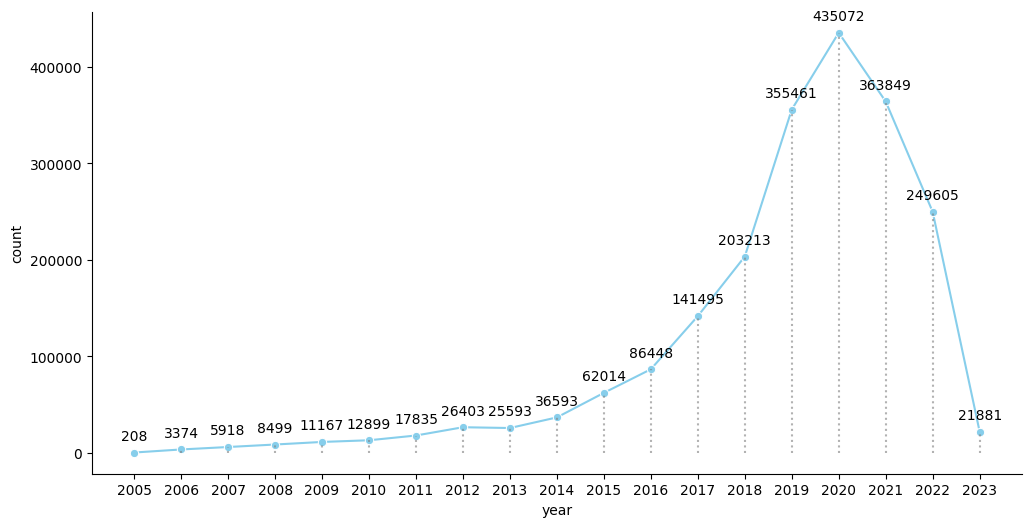

In [45]:
fig = plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="year", y="count", data=year_count,
            marker='o', color='skyblue')
sns.despine()
for x, y in zip(year_count['year'], year_count["count"]):
    ax.text(x, y+10000, y, ha='center', va='bottom', fontsize=10)
    plt.vlines(x, ymin=0, ymax=y, colors='gray', 
               linestyles='dotted', alpha=0.6)

By looking at this line plot we see big variation among number of reviews in each of the years. Starting from the first year in the dataset(2005), the number of reviews increased significantly up to 2020. Then it decreased drastically.

**In what days of the week were the reviews posted?**

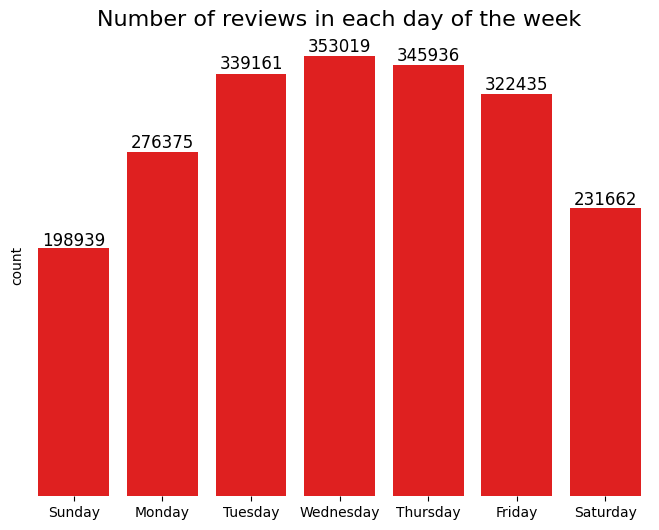

In [46]:
# for each week day, count number of reviews
days_count_q = '''
    SELECT 
    dayname(created_at) AS day_of_week, COUNT(*) count
    FROM reviews
    GROUP BY 1
    ORDER BY 1 
    '''
days_count = duckdb.query(days_count_q).to_df()
days_count["day_of_week"] = pd.Categorical(days_count["day_of_week"],
                                           categories=["Sunday", "Monday",
                                                       "Tuesday", "Wednesday",
                                                       "Thursday", "Friday",
                                                       "Saturday"],
                                           ordered=True)

fig = plt.figure(figsize=(8, 6))
ax = sns.barplot(x="day_of_week", y="count", 
                 data=days_count, color="red")
customize_bar("v", ax)
ax.set_xlabel("")
plt.title("Number of reviews in each day of the week",
         fontsize=16);

This bar plot suggests an interesting pattern: the most number of reviews are in the middle of the week(Wednesday is the leader). On Saturday and Sunday people post reviews way more rarely

### Statistical Inference:

We will test the following hypotheses:
   * **Is the proportion of reviews to podcasts on iTunes platform on Wednesday significantly higher from each of the other days?**
   * **Is average rating of podcasts related to business topics significantly bigger then the average rating of non-business podcasts?**
   * **Is there a significant difference between average ratings of the worst rated genres of podcasts: "news-daily-news" and "true-crime"?**

**Target population**: Reviews to podcasts on iTunes platform.

**Hypothesis**: Is the proportion of reviews to podcasts on iTunes platform on Wednesday significantly higher from each of the other days?

**Null hypothesis**: The proportion of reviews on Wednesday is not significantly higher than the proportion of reviews on any other week day.

**Alternative hypothesis**: The proportion of reviews on Wednesday is significantly higher than the proportion of reviews on any other week day.

**Significance level**: 0.05.

We will conduct multiple z-tests comparing proportion of reviews on Wednesday to any other day of the week. Because of that, we will adjust our significance level using Bonferroni correction. We will have 6 tests. Therefore, the significance level for each will be:

In [47]:
0.05 / 6

0.008333333333333333

If each of the tests will produce p-value lower than the value above, we will have strong evidence to reject our null hypothesis

Before conducting these tests, let's check whether the assumptions are met:
   * Large enough sample size(>10 number of reviews on each of the day). Here, our sample size is large and it definitely satisfies this assumption
   * Simple Random Sampling. Given the number of reviews and podcasts, our data seems comprehensive enough to represent the population. However, since the web page where the data was downloaded did not specify how the data was collected, we'll assume and treat this data as a simple random sample.
   * Indepedence. If our data was collected using simple random sampling, there should be no dependencies between the number of reviews on different weekdays. Even if the same person posts reviews on the same days (e.g., Wednesday and Sunday) every week, it might be due to the release schedule of the podcasts they listen to, which doesn't imply dependency in our sample. Nevertheless, we should check for any authors who post significantly more than others, as they might be using bots to post reviews on the same weekdays every week. This could indeed influence the number of reviews on certain weekdays.
   
   
For each author, count number of reviews they posted

In [48]:
author_reviews_q = '''
    SELECT author_id, COUNT(*) count
    FROM reviews
    GROUP BY 1
    ORDER BY 2 DESC
    '''
author_count = duckdb.query(author_reviews_q).to_df()
author_count.describe()

,count
count,1.475283e+06
mean,1.401444e+00
std,2.133662e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,6.150000e+02


We observe that nearly 1.5 million different users have posted more than 2 million reviews. The majority of these users posted only one review. However, a few users have posted significantly more reviews, with the maximum being 615 reviews by a single user. Let's examine the distribution of reviews on weekdays for the users who posted the most reviews.

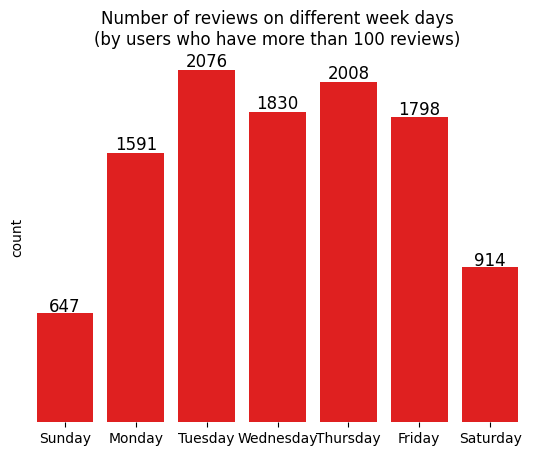

In [49]:
# for users who posted more than 100 reviews
# count number of reviews on each week day
days_count_q = '''
    SELECT 
    dayname(created_at) AS day_of_week, COUNT(*) count
    FROM reviews
    WHERE author_id IN (
                        SELECT author_id
                        FROM reviews
                        GROUP BY 1
                        HAVING COUNT(*) > 100)
    GROUP BY 1
    '''
best_users = duckdb.query(days_count_q).to_df()
best_users["day_of_week"] = pd.Categorical(best_users["day_of_week"],
                                           categories=["Sunday", "Monday",
                                                       "Tuesday", "Wednesday",
                                                       "Thursday", "Friday",
                                                       "Saturday"],
                                           ordered=True)

ax = sns.barplot(x="day_of_week", y="count", data=best_users, color='red')
customize_bar("v", ax)
ax.set_xlabel("")
plt.title("Number of reviews on different week days\n"
          "(by users who have more than 100 reviews)");

The distribution of reviews counts for these users is pretty similar to the distribution for all the users. Therefore. Our assumption of independence is met.

In [50]:
days_count.set_index("day_of_week", inplace=True)
count_wed = days_count.loc["Wednesday"].values[0]

total = days_count.sum()

for day in days_count.index:
    if day == "Wednesday":
        continue
    
    count_other = days_count.loc[day].values[0]
    result = sm.stats.test_proportions_2indep(count_wed,
                                         total, 
                                         count_other, 
                                         total, 
                                         alternative="larger")[1][0]
    print("----------------------------------------")
    print(f"p-value for test of {day} and Wednesday:")
    print(result)

----------------------------------------
p-value for test of Friday and Wednesday:
0.0
----------------------------------------
p-value for test of Monday and Wednesday:
0.0
----------------------------------------
p-value for test of Saturday and Wednesday:
0.0
----------------------------------------
p-value for test of Sunday and Wednesday:
0.0
----------------------------------------
p-value for test of Thursday and Wednesday:
7.427247105710887e-21
----------------------------------------
p-value for test of Tuesday and Wednesday:
9.395739733490884e-75


For 4 out of 6 tests the p-value is 0, for 2 the p-value is very close to 0. This gives us strong evidence that people tend to post more reviews on Wednesday than on any other day of the week.

**Target population**: Ratings to podcasts on iTunes platform.

**Hypothesis**: Is average rating of podcasts related to business topics significantly bigger then the average rating of non-business podcasts.

**Null hypothesis**: Average rating of podcasts which have business genres is equal or smaller than the average rating of non-business podcasts.

**Alternative hypothesis**: Average rating of podcasts which have business genres is bigger than the average rating of non-business podcasts.

**Significance level**: 0.01.

Extract business related podcasts and their average ratings

In [51]:
# calculate average ratings for business and non-business podcasts
business_rating_q = '''
    SELECT podcast_id, AVG(rating) rating, 'yes' business
    FROM reviews
    WHERE podcast_id IN (
                        SELECT podcast_id
                        FROM categories
                        WHERE category LIKE 'business%'
                        )
    GROUP BY 1
    UNION
    SELECT podcast_id, AVG(rating) rating, 'no' business
    FROM reviews
    WHERE podcast_id NOT IN (
                        SELECT podcast_id
                        FROM categories
                        WHERE category LIKE 'business%'
                        )
    GROUP BY 1
    '''
business_rating = duckdb.query(business_rating_q).to_df()

In [52]:
business_rating.groupby("business")['rating'].mean()

business
no     4.797737
yes    4.892623
Name: rating, dtype: float64

Before conducting this test, let's check whether the assumptions are met:
   * The values follow a normal distributions or we have large enough sample size:

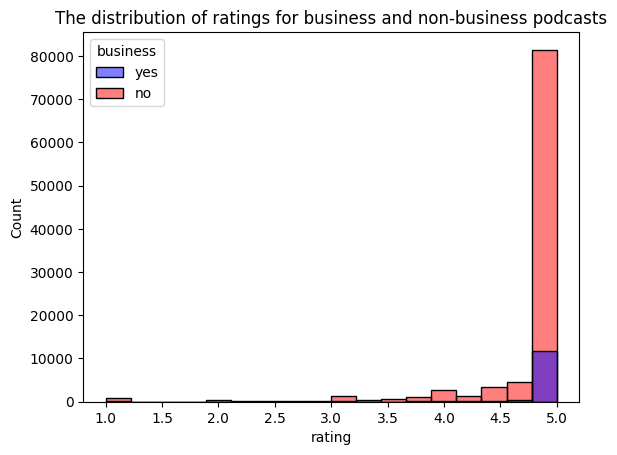

In [53]:
sns.histplot(x="rating", data=business_rating, hue='business',
            palette=["blue", "red"])
plt.title("The distribution of ratings for business and non-business podcasts");

In [54]:
business_rating.groupby("business").size()

business
no     98613
yes    12931
dtype: int64

Despite the fact, that the data is very far from being normal, our sample sizes are very large. Thus, we can apply Central Limit Theorem.

* Independence. We have unique podcasts in each of the group:

In [55]:
business_rating["podcast_id"].is_unique

True

All our assumptions are met. Therefore, let's calculate Confidence intervals for means of both groups

In [56]:
business_ratings = business_rating[business_rating['business'] == 'yes']
non_business_ratings = business_rating[business_rating['business'] == 'no']

business_ci = (sm.stats.DescrStatsW(
    business_ratings['rating']).zconfint_mean(alpha=0.01)
              )
non_business_ci = (sm.stats.DescrStatsW(
    non_business_ratings['rating']).zconfint_mean(alpha=0.01)
              )
business_ci, non_business_ci

((4.882778711729235, 4.902466771808787),
 (4.792940940514034, 4.802532236469688))

By looking at 99% Confidence Intervals for average ratings of both group of podcasts, we see that there is strong evidence to reject the null hypothesis. Therefore, we conclude that average rating of business related podcasts is statistically significantly higher than the average rating of non-business related podcasts.   

**Target population**: Podcasts on iTunes platform whose genres are "news-daily-news" or "true-crime"

**Hypothesis**: Is there a significant difference between average ratings of the worst rated genres of podcasts: "news-daily-news" and "true-crime"?

**Null hypothesis**: There is no significant difference between the average ratings of the two worst rated genres of podcasts

**Alternative hypothesis**: There is significant difference between the average ratings of the two worst rated genres of podcasts.

**Significance level**: 0.05.

In [57]:
worst_genres_stat_q = '''
                    SELECT podcast_id, AVG(rating) rating,
                    'daily-news' category
                    FROM reviews
                    WHERE podcast_id IN (
                                    SELECT podcast_id
                                    FROM categories
                                    WHERE category 
                                    == 'news-daily-news')
                    GROUP BY 1
                    UNION
                    SELECT podcast_id, AVG(rating) rating,
                    'true-crime' category
                    FROM reviews
                    WHERE podcast_id IN (
                                    SELECT podcast_id
                                    FROM categories
                                    WHERE category 
                                    == 'true-crime')
                    GROUP BY 1
                    '''
worst_genres = duckdb.query(worst_genres_stat_q).to_df()
worst_genres = (worst_genres[
    ~worst_genres["podcast_id"].duplicated(keep=False)])

Before conducting this test, let's check whether the assumptions are met:
   * The values follow a normal distributions or we have large enough sample size:

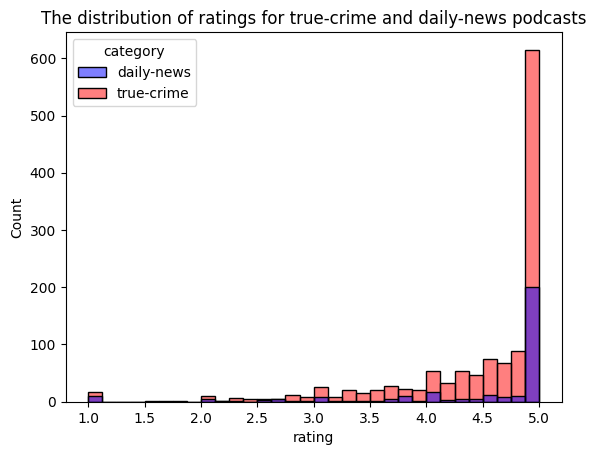

In [58]:
sns.histplot(x="rating", data=worst_genres, hue='category',
                        palette=["blue", "red"])
plt.title("The distribution of ratings for true-crime and daily-news podcasts");

In [59]:
worst_genres.groupby("category").size()

category
daily-news     320
true-crime    1263
dtype: int64

We have big enough sample sizes. Thus, apply Central Limit Theorem

In [60]:
true_crime = worst_genres[worst_genres["category"] == "true-crime"]
daily_news = worst_genres[worst_genres["category"] == "daily-news"]
sm.stats.ttest_ind(true_crime["rating"], daily_news["rating"])

(0.4247161727784011, 0.6711013836853158, 1581.0)

Very high p-value(almost 0.7) suggests that there is no sufficient evidence to reject the Null hypothesis. Therefore, we conclude that there is no statistically significant differnce 

### Conclusion of our analysis:
   * Most frequent genre of podcasts is **Society-Culture** genre. **Education**, **Comedy**, **Religion-Spirituality**, and **Business** categories have a lot of podcasts on the platform as well. Least frequent topics are **volleyball**, **mathematics**, **chemistry**, **physics**
   * There are some diverse podcasts(which include 8 different genres): **Pursue excellence**, **frazerrice.com** and **beyond retirement**. All of them are perfectly rated but not so popular.
   * The distributions of podcast ratings and the number of reviews per podcast are highly skewed (right-skewed for ratings and left-skewed for reviews).  Majority of the podcasts have perfect ratings and low number of reviews. **I think you're dope with Eric Nam** podcasts stands out as being the perfectly rated as well as having more than 500 reviews. 
   * **Crime Junkie** is an absolute leader in the iTunes platform. It has 3 times(!!!) more reviews than the second most popular podcast. Its genre is true-crime and rating is 4.2.
   * We have found two genres which gather considerably more reviews than others - **true-crime** and **kids-family-stories-for-kids**. More than 100 reviews per podcasts while having more than 100 podcasts in the dataset. Additionally, **news** podcasts tend to collect many reviews.
   * **Business**  podcasts are notable for having very high ratings. Four business-related genres are among the best-rated genres. Hypothesis tests indicate with 99% confidence that business-related podcasts have significantly higher ratings than other podcasts.
   * Among two of the worst podcasts, we saw **true-crime** and **news-daily-news**. Their average ratings are lower than 4.5. Hypothesis tests do not show a significant difference in ratings between these two genres.
   * We observed a negative correlation between higher ratings and fewer reviews per podcast, with the exception of **kids**-related topics.
   * There is significant variation in the number of reviews across different years. From the first year in the dataset (2005) to 2020, the number of reviews increased significantly, reflecting the growing popularity of podcasts. However, after 2020, this trend changed drastically. Due to incomplete information on how these podcasts were collected, we cannot draw definitive conclusions about this trend.
   * The number of reviews varies significantly across different weekdays. Midweek, especially on Wednesdays, sees more reviews than weekends. Hypothesis testing confirms with high certainty that the number of reviews on Wednesdays is significantly higher than on any other weekday.
   
   
   
### Recommendations:
   * **Society-Culture**, **Education**, **Comedy**, **Religion-Spirituality**, and **Business** genres are highly frequent on the platform. Continue to support and invest into podcasts in these genres as they have a broad audience base.
   * Encourage content creators to create podcasts in underrepresented genres like volleyball, mathematics, chemistry, and physics to diversify the podcast offerings and attract niche audiences.
   * Given the skewed distribution of reviews and ratings, consider strategies to encourage more listener engagement and review submissions. This could involve incentivizing reviews or making the review process more accessible. This way, we will be able to get more precise ratings for the podcasts.
   * Invest in **news**, **kids**, **crime** genres, which tend to attract more users. Especially, focus on **true-crime** and **kids-family-stories-for-kids** genres.
   * Since Wednesdays see a spike in review activity, create more podcasts exactly on this day.
   * Given the negative correlation between higher ratings and fewer reviews, focus on creating high-quality content that resonates with listeners and encourages organic reviews rather than solely aiming for higher review counts.

### Suggestions on how to improve the analysis:
   * Gather more data on podcasts that could help to analyze the reasons behing such variation in number of reviews on different week days and different years.
   * Gather additional data points such as listener demographics, geographic locations, and device usage to gain deeper insights into audience preferences and behaviors.
   * Compare the performance of iTunes podcasts against competitors on other platforms to gain a broader perspective and identify areas for improvement or differentiation.
   * Track engagement metrics such as listen duration, episode completion rates to assess content effectiveness and optimize future productions.